# Baseline

In [60]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

In [230]:
train_df = pd.read_parquet("/kaggle/input/alphadataset/train_data.pqt")
test_df = pd.read_parquet("/kaggle/input/alphadataset/test_data.pqt")

In [231]:
train_df.head(3)

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,...,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster,end_cluster
0,0,month_1,0.744845,0.705492,1.287207,0.748101,channel_code_5,city_23,city_type_0,index_city_code_39,...,0.951166,0.568681,0.897565,0.553624,0.774354,0.936506,0.295984,0.967947,"{α, γ}",{other}
1,0,month_2,1.049605,0.831916,2.458609,1.053805,channel_code_5,city_23,city_type_0,index_city_code_39,...,0.948812,0.499716,0.785029,0.551904,0.696576,0.990157,0.298873,0.945969,"{α, γ}",{other}
2,0,month_3,0.692653,0.740253,0.430042,0.695747,channel_code_5,city_23,city_type_0,index_city_code_39,...,0.946458,0.442244,0.877050,0.551044,0.663243,0.810065,0.294829,0.956958,"{α, γ}",{other}


In [232]:
test_df.head(3)

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,...,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster
0,200000,month_4,-0.096224,0.335496,-0.125995,-0.095578,channel_code_12,city_14,city_type_0,None,...,0.010952,0.946066,0.407762,-0.153950,0.548895,0.541020,0.031742,0.257278,0.561353,{α}
1,200000,month_5,-0.024255,-0.059806,-0.124295,-0.023381,channel_code_12,city_14,city_type_0,None,...,0.006812,0.945281,0.396267,-0.150505,0.549468,0.552131,0.237817,0.264211,0.715199,{α}
2,200000,month_6,0.045988,0.049418,-0.125995,0.047079,channel_code_12,city_14,city_type_0,None,...,0.006812,0.945281,0.396267,-0.152800,0.549468,0.541020,0.387566,0.268543,0.836079,None


In [233]:
cat_cols = [
    "channel_code", "city", "city_type",
    "okved", "segment", "start_cluster",
    "index_city_code", "ogrn_month", "ogrn_year"
]

In [234]:
non_cat_cols = train_df.drop(cat_cols, axis=1)

In [235]:
test_df

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,...,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster
0,200000,month_4,-0.096224,0.335496,-0.125995,-0.095578,channel_code_12,city_14,city_type_0,None,...,0.010952,0.946066,0.407762,-0.153950,0.548895,0.541020,0.031742,0.257278,0.561353,{α}
1,200000,month_5,-0.024255,-0.059806,-0.124295,-0.023381,channel_code_12,city_14,city_type_0,None,...,0.006812,0.945281,0.396267,-0.150505,0.549468,0.552131,0.237817,0.264211,0.715199,{α}
2,200000,month_6,0.045988,0.049418,-0.125995,0.047079,channel_code_12,city_14,city_type_0,None,...,0.006812,0.945281,0.396267,-0.152800,0.549468,0.541020,0.387566,0.268543,0.836079,None
3,200001,month_4,-0.156722,-0.204920,-0.125856,-0.156258,channel_code_9,city_76,city_type_0,None,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
4,200001,month_5,-0.156722,-0.204920,-0.125856,-0.156258,channel_code_9,city_76,city_type_0,None,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290115,299998,month_5,NaN,NaN,NaN,NaN,None,None,None,None,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{}
290116,299998,month_6,-0.155350,-0.203711,-0.125995,-0.155980,channel_code_9,city_25,city_type_0,index_city_code_30,...,-0.028584,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.201123,0.250924,0.374540,None
290117,299999,month_4,-0.145899,-0.173298,-0.125995,-0.145402,channel_code_9,city_6,city_type_0,index_city_code_34,...,-0.028584,0.944497,0.384773,-0.097640,0.550901,0.574354,-0.101369,0.252657,0.440474,{α}
290118,299999,month_5,-0.136402,-0.163874,-0.121475,-0.135876,channel_code_9,city_6,city_type_0,index_city_code_34,...,-0.028584,0.944497,0.384773,-0.047885,0.555057,0.696576,-0.034860,0.253523,0.473441,{α}


Обозначение категориальных признаков

In [236]:
train_df[cat_cols] = train_df[cat_cols].astype("str")
test_df[cat_cols] = test_df[cat_cols].astype("str")

Создаем выборки для валидации и обучения

Оставляем только 3 месяц, данные за 1 и 2 добаляем как новые столбцы

In [237]:
import pandas as pd


# Фильтрация данных, оставляем только записи за последний месяц
last_month_df = train_df[train_df['date'] == 'month_3']

# Создание DataFrame для данных за предыдущие два месяца
prev_month_2_df = train_df[train_df['date'] == 'month_2'].set_index('id')
prev_month_1_df = train_df[train_df['date'] == 'month_1'].set_index('id')
prev_month_2_df[cat_cols] = prev_month_2_df[cat_cols].astype("category")
prev_month_1_df[cat_cols] = prev_month_1_df[cat_cols].astype("category")

# Переименование столбцов, чтобы избежать конфликтов имен
prev_month_2_df.columns = [f'{col}_prev_month_2' for col in prev_month_2_df.columns]
prev_month_1_df.columns = [f'{col}_prev_month_1' for col in prev_month_1_df.columns]

# Объединение данных за предыдущие месяцы
prev_months_combined = prev_month_2_df.join(prev_month_1_df, how='outer')

# Объединение данных за последний месяц с данными за предыдущие месяцы
final_df = last_month_df.set_index('id').join(prev_months_combined, how='left')
# Вывод результата
final_df


,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,ogrn_days_end_month,...,cnt_cred_g_oper_3m_prev_month_1,cnt_days_cred_g_oper_3m_prev_month_1,sum_deb_h_oper_3m_prev_month_1,cnt_deb_h_oper_3m_prev_month_1,cnt_days_deb_h_oper_3m_prev_month_1,sum_cred_h_oper_3m_prev_month_1,cnt_cred_h_oper_3m_prev_month_1,cnt_days_cred_h_oper_3m_prev_month_1,start_cluster_prev_month_1,end_cluster_prev_month_1
id,,,,,,,,,,,,,,,,,,,,,
0,month_3,0.692653,0.740253,0.430042,0.695747,channel_code_5,city_23,city_type_0,index_city_code_39,-0.488553,...,0.951166,0.568681,0.897565,0.553624,0.774354,0.936506,0.295984,0.967947,"{α, γ}",{other}
1,month_3,-0.090605,-0.114275,-0.114119,-0.089937,channel_code_2,city_14,city_type_0,None,0.324343,...,0.945281,0.407762,0.369318,0.567093,0.785465,-0.184002,0.253523,0.462452,{other},{other}
2,month_3,-0.148737,-0.187003,-0.112416,-0.148249,channel_code_12,city_613,city_type_306,None,-0.256297,...,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.178674,0.252657,0.440474,{α},{α}
3,month_3,-0.156522,-0.204718,-0.125759,-0.156058,channel_code_14,city_21,city_type_0,index_city_code_46,-1.185321,...,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.201123,0.250924,0.374540,{α},{α}
4,month_3,-0.141798,-0.170262,-0.125672,-0.141289,channel_code_8,city_21,city_type_0,None,-1.417577,...,0.957443,0.672129,-0.078233,0.558209,0.707687,-0.178408,0.252946,0.440474,{α},{α}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,month_3,-0.039281,-0.053694,-0.044193,-0.038454,channel_code_9,city_20,city_type_0,index_city_code_28,1.601751,...,0.944497,0.384773,-0.161095,0.547319,0.429909,-0.201123,0.250924,0.374540,"{α, η}",{other}
199996,month_3,0.293117,0.189316,0.857952,0.294974,channel_code_14,city_3595,city_type_2778,index_city_code_48,-0.953065,...,0.944889,0.396267,-0.151699,0.553767,0.574354,-0.201123,0.250924,0.374540,"{α, γ}","{α, γ}"
199997,month_3,0.032941,0.140726,-0.125362,0.033992,channel_code_8,city_0,city_type_0,index_city_code_58,1.485623,...,0.944889,0.396267,1.185234,0.571535,0.918798,0.955885,0.264788,0.693221,{other},{other}


In [238]:
clusters = ['start_cluster_prev_month_1','start_cluster_prev_month_2','end_cluster_prev_month_1','end_cluster_prev_month_2']
final_df[clusters] = final_df[clusters].astype('category')

In [239]:
cat_cols = [
    "channel_code", "city", "city_type",
    "okved", "segment", "start_cluster",
    "index_city_code", "ogrn_month", "ogrn_year"
]

# Функция для добавления суффиксов
def add_suffix(cols, suffix):
    return [col + suffix for col in cols]

# Добавление суффиксов "_prev_month_2" и "_prev_month_1"
cat_cols = add_suffix(cat_cols, "_prev_month_2") + add_suffix(cat_cols, "_prev_month_1")
cat_cols = cat_cols+[
    "channel_code", "city", "city_type",
    "okved", "segment", "start_cluster",
    "index_city_code", "ogrn_month", "ogrn_year",'start_cluster_prev_month_1','start_cluster_prev_month_2',
]
# Вывод результата
print(cat_cols)

['channel_code_prev_month_2', 'city_prev_month_2', 'city_type_prev_month_2', 'okved_prev_month_2', 'segment_prev_month_2', 'start_cluster_prev_month_2', 'index_city_code_prev_month_2', 'ogrn_month_prev_month_2', 'ogrn_year_prev_month_2', 'channel_code_prev_month_1', 'city_prev_month_1', 'city_type_prev_month_1', 'okved_prev_month_1', 'segment_prev_month_1', 'start_cluster_prev_month_1', 'index_city_code_prev_month_1', 'ogrn_month_prev_month_1', 'ogrn_year_prev_month_1', 'channel_code', 'city', 'city_type', 'okved', 'segment', 'start_cluster', 'index_city_code', 'ogrn_month', 'ogrn_year', 'start_cluster_prev_month_1', 'start_cluster_prev_month_2']


In [240]:
zero_importance = ['city_type',
 'cnt_cred_d_oper_1m',
 'sum_deb_d_oper_3m',
 'cnt_deb_d_oper_3m',
 'sum_cred_d_oper_3m',
 'cnt_days_cred_f_oper_3m',
 'cnt_days_cred_g_oper_3m',
 'cnt_cred_h_oper_3m',
 'city_prev_month_2',
 'city_type_prev_month_2',
 'ogrn_days_end_quarter_prev_month_2',
 'sum_of_paym_2m_prev_month_2',
 'cnt_b_oper_1m_prev_month_2',
 'cnt_days_cred_f_oper_1m_prev_month_2',
 'cnt_deb_g_oper_1m_prev_month_2',
 'cnt_days_cred_g_oper_1m_prev_month_2',
 'cnt_deb_h_oper_1m_prev_month_2',
 'cnt_cred_h_oper_1m_prev_month_2',
 'cnt_days_cred_h_oper_1m_prev_month_2',
 'sum_b_oper_3m_prev_month_2',
 'sum_cred_d_oper_3m_prev_month_2',
 'cnt_cred_d_oper_3m_prev_month_2',
 'sum_cred_f_oper_3m_prev_month_2',
 'cnt_days_cred_f_oper_3m_prev_month_2',
 'cnt_deb_g_oper_3m_prev_month_2',
 'cnt_cred_g_oper_3m_prev_month_2',
 'city_type_prev_month_1',
 'sum_a_oper_1m_prev_month_1',
 'cnt_b_oper_1m_prev_month_1',
 'sum_cred_d_oper_1m_prev_month_1',
 'cnt_cred_e_oper_1m_prev_month_1',
 'cnt_days_deb_f_oper_1m_prev_month_1',
 'cnt_days_cred_f_oper_1m_prev_month_1',
 'cnt_deb_g_oper_1m_prev_month_1',
 'cnt_days_deb_g_oper_1m_prev_month_1',
 'sum_cred_g_oper_1m_prev_month_1',
 'cnt_days_cred_h_oper_1m_prev_month_1',
 'cnt_deb_d_oper_3m_prev_month_1',
 'sum_cred_d_oper_3m_prev_month_1',
 'cnt_cred_f_oper_3m_prev_month_1',
                  'sum_c_oper_1m', 'cnt_c_oper_1m', 'sum_cred_d_oper_1m',
       'sum_cred_f_oper_1m', 'cnt_cred_f_oper_1m',
       'cnt_days_cred_g_oper_1m', 'sum_b_oper_3m', 'cnt_b_oper_3m',
       'cnt_cred_d_oper_3m', 'cnt_days_deb_f_oper_3m',
       'sum_cred_f_oper_3m', 'cnt_cred_f_oper_3m', 'cnt_cred_g_oper_3m',
       'sum_a_oper_1m_prev_month_2', 'sum_b_oper_1m_prev_month_2',
       'sum_c_oper_1m_prev_month_2', 'cnt_c_oper_1m_prev_month_2',
       'sum_deb_d_oper_1m_prev_month_2', 'cnt_deb_d_oper_1m_prev_month_2',
       'sum_cred_d_oper_1m_prev_month_2',
       'cnt_cred_d_oper_1m_prev_month_2',
       'cnt_days_deb_f_oper_1m_prev_month_2',
       'sum_cred_f_oper_1m_prev_month_2',
       'cnt_cred_f_oper_1m_prev_month_2',
       'cnt_days_deb_g_oper_1m_prev_month_2',
       'sum_cred_g_oper_1m_prev_month_2',
       'cnt_cred_g_oper_1m_prev_month_2', 'cnt_a_oper_3m_prev_month_2',
       'cnt_b_oper_3m_prev_month_2', 'sum_deb_d_oper_3m_prev_month_2',
       'cnt_deb_d_oper_3m_prev_month_2',
       'cnt_days_deb_f_oper_3m_prev_month_2',
       'cnt_cred_f_oper_3m_prev_month_2',
       'cnt_days_cred_g_oper_3m_prev_month_2',
       'cnt_deb_h_oper_3m_prev_month_2',
       'cnt_days_deb_h_oper_3m_prev_month_2', 'city_prev_month_1',
       'cnt_a_oper_1m_prev_month_1', 'sum_b_oper_1m_prev_month_1',
       'sum_c_oper_1m_prev_month_1', 'cnt_c_oper_1m_prev_month_1',
       'sum_deb_d_oper_1m_prev_month_1', 'cnt_deb_d_oper_1m_prev_month_1',
       'cnt_cred_d_oper_1m_prev_month_1',
       'cnt_days_cred_e_oper_1m_prev_month_1',
       'cnt_deb_f_oper_1m_prev_month_1',
       'sum_cred_f_oper_1m_prev_month_1',
       'cnt_cred_f_oper_1m_prev_month_1',
       'cnt_cred_g_oper_1m_prev_month_1',
       'cnt_days_cred_g_oper_1m_prev_month_1',
       'sum_deb_h_oper_1m_prev_month_1',
       'cnt_days_deb_h_oper_1m_prev_month_1',
       'cnt_cred_h_oper_1m_prev_month_1', 'cnt_a_oper_3m_prev_month_1',
       'sum_b_oper_3m_prev_month_1', 'sum_c_oper_3m_prev_month_1',
       'cnt_cred_d_oper_3m_prev_month_1',
       'sum_cred_f_oper_3m_prev_month_1',
       'cnt_days_cred_f_oper_3m_prev_month_1',
       'cnt_deb_g_oper_3m_prev_month_1',
       'cnt_days_cred_g_oper_3m_prev_month_1']

In [241]:
list(set(zero_importance) & set(cat_cols))

['city_type_prev_month_2',
 'city_type',
 'city_type_prev_month_1',
 'city_prev_month_2',
 'city_prev_month_1']

In [242]:
cat_cols_to_remove = (list(set(zero_importance) & set(cat_cols)))
cat_cols_to_remove

['city_type_prev_month_2',
 'city_type',
 'city_type_prev_month_1',
 'city_prev_month_2',
 'city_prev_month_1']

In [243]:
X = final_df.drop(["date", "end_cluster",'date_prev_month_1','date_prev_month_2','end_cluster_prev_month_1','end_cluster_prev_month_2'], axis=1)
X = X.drop(zero_importance, axis=1)
cat_cols = list(set(cat_cols).difference(cat_cols_to_remove))
y = final_df["end_cluster"]

## Обучение модели

В качестве базовой модели возьмем Catboost обучим на всех признаках

In [104]:
from catboost import CatBoostClassifier, cv, Pool

Зададим функцию для взвешенной метрики roc auc

In [105]:
def weighted_roc_auc(y_true, y_pred, labels, weights_dict):
    unnorm_weights = np.array([weights_dict[label] for label in labels])
    weights = unnorm_weights / unnorm_weights.sum()
    classes_roc_auc = roc_auc_score(y_true, y_pred, labels=labels,
                                    multi_class="ovr")#, average=None)
    return sum(weights * classes_roc_auc)

In [106]:
cluster_weights = pd.read_excel("/kaggle/input/alphadataset/cluster_weights.xlsx").set_index("cluster")
weights_dict = cluster_weights["unnorm_weight"].to_dict()

Проверка работы модели

**Модель без учета весов**

In [107]:
cv_dataset = Pool(data=X,
                  label=y,
                  cat_features=cat_cols)

In [108]:
catboost_params = {
    'iterations': 1500,
    'learning_rate': 0.05,
    'depth': 6,
    'loss_function': 'MultiClass',
    'task_type': 'GPU',  # Specify GPU usage
    'random_seed': 42,
    'early_stopping_rounds': 10
}

# Create CatBoost classifier
model0 = cv(cv_dataset, params=catboost_params, seed=42, fold_count=4, return_models=True)

Training on fold [0/4]
0:	learn: 2.4243419	test: 2.4252461	best: 2.4252461 (0)	total: 87.3ms	remaining: 2m 10s
1:	learn: 2.1962883	test: 2.1976142	best: 2.1976142 (1)	total: 150ms	remaining: 1m 52s
2:	learn: 2.0344541	test: 2.0360118	best: 2.0360118 (2)	total: 214ms	remaining: 1m 46s
3:	learn: 1.9094883	test: 1.9110718	best: 1.9110718 (3)	total: 275ms	remaining: 1m 42s
4:	learn: 1.8058864	test: 1.8075563	best: 1.8075563 (4)	total: 323ms	remaining: 1m 36s
5:	learn: 1.7200355	test: 1.7217540	best: 1.7217540 (5)	total: 363ms	remaining: 1m 30s
6:	learn: 1.6467748	test: 1.6486159	best: 1.6486159 (6)	total: 405ms	remaining: 1m 26s
7:	learn: 1.5828824	test: 1.5847856	best: 1.5847856 (7)	total: 449ms	remaining: 1m 23s
8:	learn: 1.5266016	test: 1.5285897	best: 1.5285897 (8)	total: 489ms	remaining: 1m 21s
9:	learn: 1.4770457	test: 1.4791332	best: 1.4791332 (9)	total: 529ms	remaining: 1m 18s
10:	learn: 1.4329659	test: 1.4351445	best: 1.4351445 (10)	total: 565ms	remaining: 1m 16s
11:	learn: 1.3930

In [261]:
catboost_params = {
    'iterations': 1100,
    'learning_rate': 0.05,
    'depth': 6,
    'loss_function': 'MultiClass',
    'task_type': 'GPU',  # Specify GPU usage
    'random_seed': 42
}

In [262]:
model0 = CatBoostClassifier(**catboost_params)

In [263]:
model0.fit(X, y, cat_features=cat_cols, verbose=10)

0:	learn: 2.4239725	total: 65.4ms	remaining: 1m 11s
10:	learn: 1.4333047	total: 554ms	remaining: 54.8s
20:	learn: 1.1559769	total: 957ms	remaining: 49.2s
30:	learn: 1.0245511	total: 1.4s	remaining: 48.4s
40:	learn: 0.9530678	total: 1.84s	remaining: 47.6s
50:	learn: 0.9102606	total: 2.27s	remaining: 46.7s
60:	learn: 0.8851955	total: 2.69s	remaining: 45.9s
70:	learn: 0.8687503	total: 3.16s	remaining: 45.8s
80:	learn: 0.8574128	total: 3.6s	remaining: 45.4s
90:	learn: 0.8489412	total: 4.03s	remaining: 44.7s
100:	learn: 0.8432316	total: 4.43s	remaining: 43.8s
110:	learn: 0.8380973	total: 4.84s	remaining: 43.1s
120:	learn: 0.8333069	total: 5.25s	remaining: 42.5s
130:	learn: 0.8295786	total: 5.65s	remaining: 41.8s
140:	learn: 0.8260135	total: 6.07s	remaining: 41.3s
150:	learn: 0.8235220	total: 6.47s	remaining: 40.7s
160:	learn: 0.8210563	total: 6.85s	remaining: 40s
170:	learn: 0.8183466	total: 7.24s	remaining: 39.3s
180:	learn: 0.8162525	total: 7.63s	remaining: 38.7s
190:	learn: 0.8141875	tot

In [ ]:
# Сохранение модели в файл
model0.save_model('catboost_model2.bin')

In [264]:
y_pred_proba_train0 = model0.predict_proba(X)
weighted_roc_auc(y, y_pred_proba_train0, model0.classes_, weights_dict)

0.9533605295811041

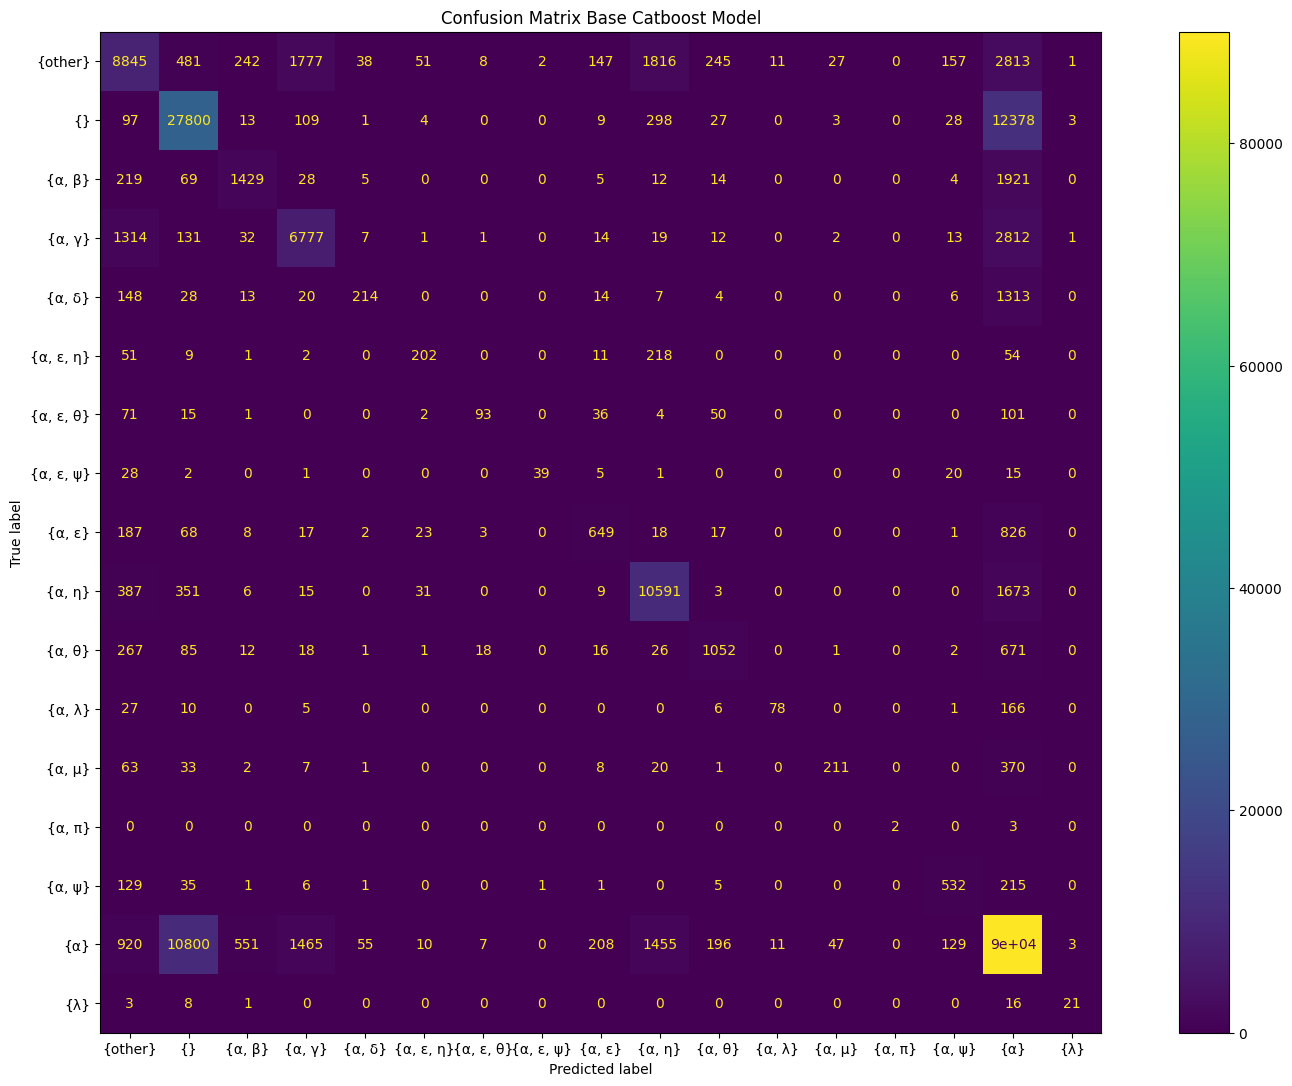

In [114]:
preds0 = model0.predict(X)
figure, ax = plt.subplots(figsize=(20, 13))
ConfusionMatrixDisplay.from_predictions(y, preds0, ax=ax)
plt.title('Confusion Matrix Base Catboost Model')
plt.show()

In [265]:
feature_importances = pd.DataFrame(zip(x_train.columns, model0.feature_importances_))
feature_importances.columns = ['feature name', 'importance']
feature_importances

,feature name,importance
0,balance_amt_avg,1.218084
1,balance_amt_max,1.805033
2,balance_amt_min,3.329725
3,balance_amt_day_avg,1.108665
4,channel_code,2.052269
...,...,...
164,ogrn_year_prev_month_1,0.171158
165,ft_registration_date_prev_month_1,0.199595
166,max_founderpres_prev_month_1,0.104926
167,min_founderpres_prev_month_1,0.143750


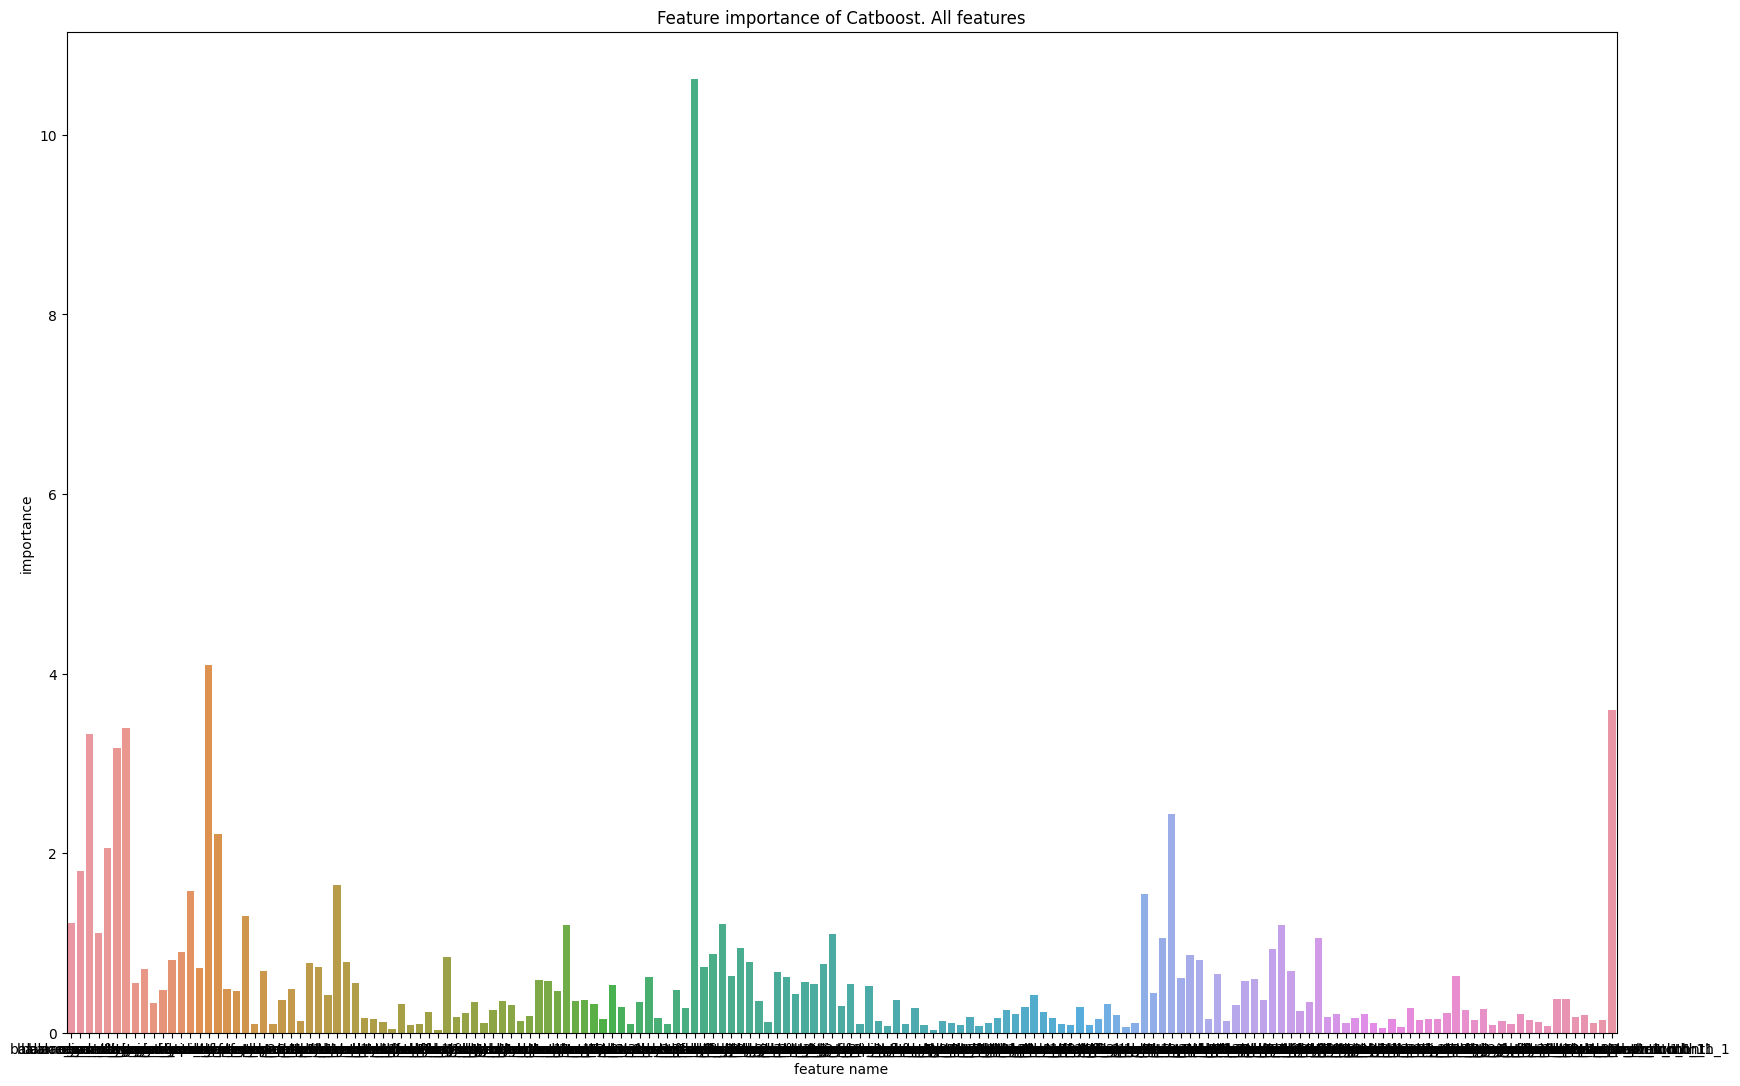

In [266]:
figure, ax = plt.subplots(figsize=(20, 13))
sns.barplot(x = feature_importances['feature name'], y=feature_importances['importance'], ax=ax)
plt.title('Feature importance of Catboost. All features')
plt.show()

In [117]:
very_important = feature_importances[feature_importances['importance'] > 1]

In [118]:
very_important

,feature name,importance
0,balance_amt_avg,1.218083
1,balance_amt_max,1.805033
2,balance_amt_min,3.329727
3,balance_amt_day_avg,1.108666
4,channel_code,2.052269
5,city,3.170987
6,index_city_code,3.398325
13,min_founderpres,1.502761
15,okved,4.091748
16,segment,2.215555


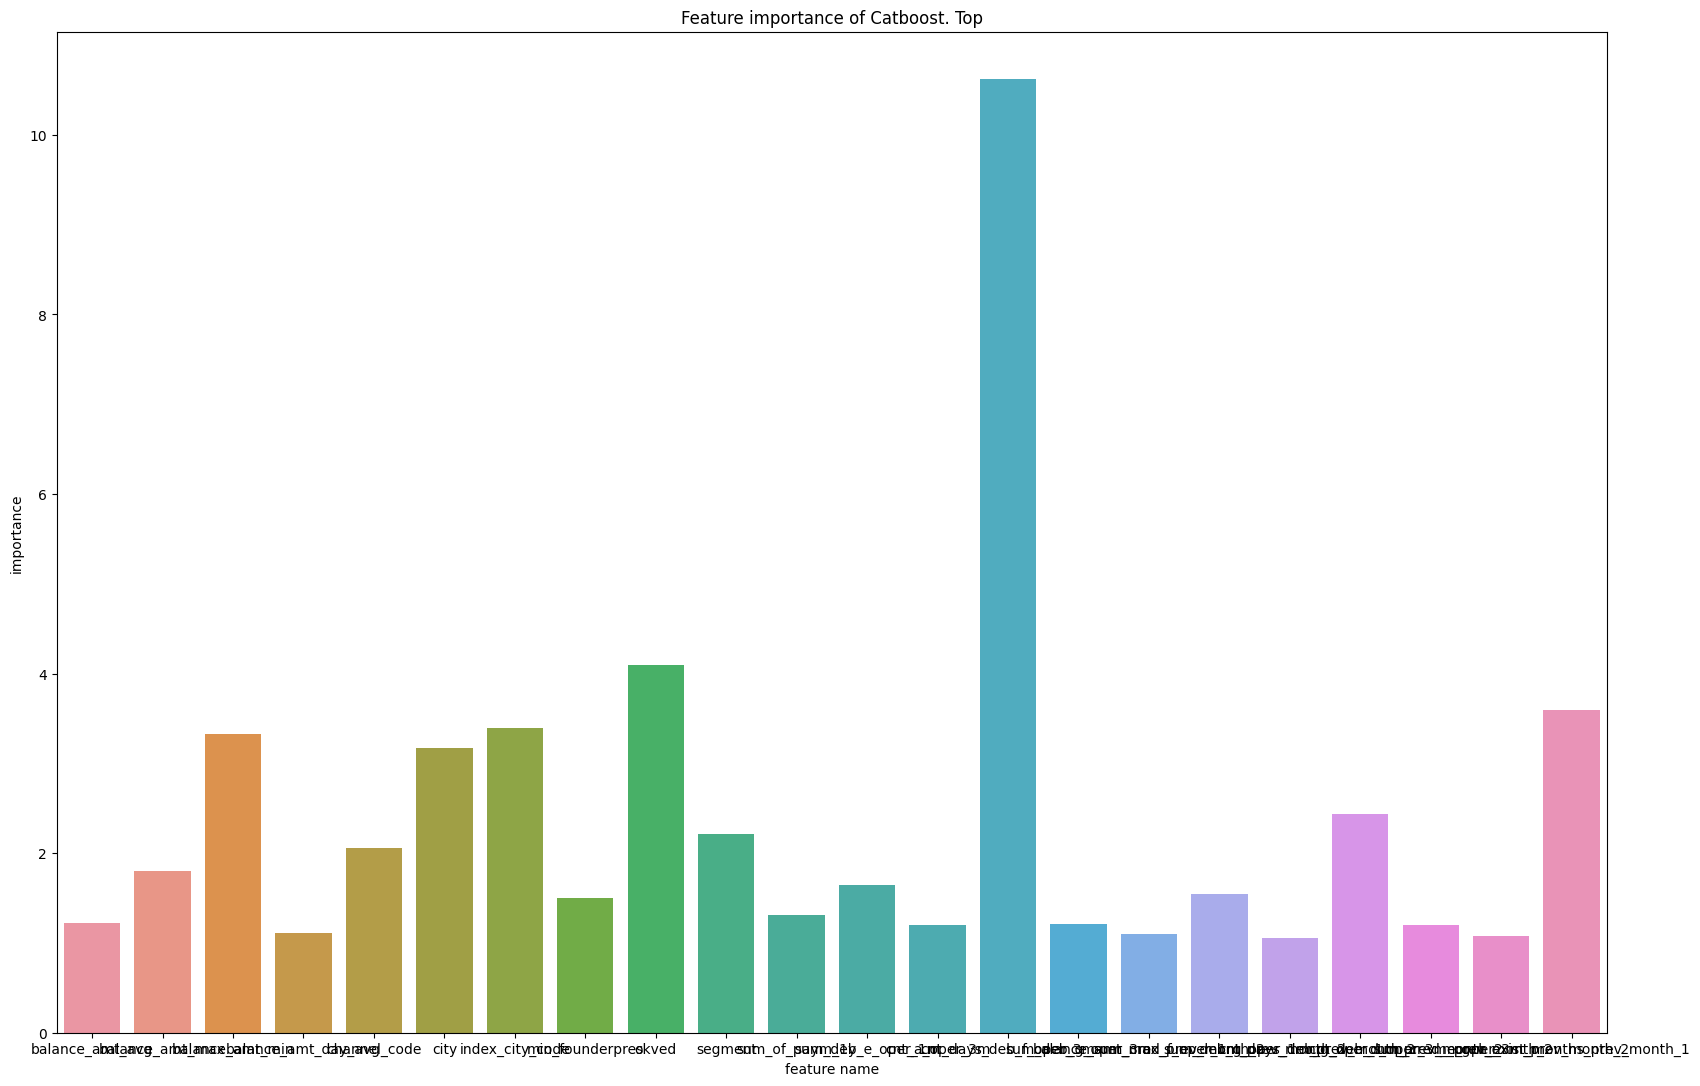

In [267]:
figure, ax = plt.subplots(figsize=(20, 13))
sns.barplot(x = very_important['feature name'], y=very_important['importance'], ax=ax)
plt.title('Feature importance of Catboost. Top')
plt.show()

## Прогноз на тестовой выборке

In [331]:
cat_cols = [
    "channel_code", "city", "city_type",
    "okved", "segment", "start_cluster",
    "index_city_code", "ogrn_month", "ogrn_year"
]

# Фильтрация данных, оставляем только записи за последний месяц
last_month_df = test_df[test_df['date'] == 'month_6']

# Создание DataFrame для данных за предыдущие два месяца
prev_month_5_df = test_df[test_df['date'] == 'month_5'].set_index('id')
prev_month_4_df = test_df[test_df['date'] == 'month_4'].set_index('id')
prev_month_5_df[cat_cols] = prev_month_5_df[cat_cols].astype("category")
prev_month_4_df[cat_cols] = prev_month_4_df[cat_cols].astype("category")

# Переименование столбцов, чтобы избежать конфликтов имен
prev_month_5_df.columns = [f'{col}_prev_month_2' for col in prev_month_5_df.columns]
prev_month_4_df.columns = [f'{col}_prev_month_1' for col in prev_month_4_df.columns]

# Объединение данных за предыдущие месяцы
prev_months_combined = prev_month_5_df.join(prev_month_4_df, how='outer')

# Объединение данных за последний месяц с данными за предыдущие месяцы
final_df = last_month_df.set_index('id').join(prev_months_combined, how='left')

# Вывод результата
final_df


,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,ogrn_days_end_month,...,sum_cred_g_oper_3m_prev_month_1,cnt_cred_g_oper_3m_prev_month_1,cnt_days_cred_g_oper_3m_prev_month_1,sum_deb_h_oper_3m_prev_month_1,cnt_deb_h_oper_3m_prev_month_1,cnt_days_deb_h_oper_3m_prev_month_1,sum_cred_h_oper_3m_prev_month_1,cnt_cred_h_oper_3m_prev_month_1,cnt_days_cred_h_oper_3m_prev_month_1,start_cluster_prev_month_1
id,,,,,,,,,,,,,,,,,,,,,
200000,month_6,0.045988,0.049418,-0.125995,0.047079,channel_code_12,city_14,city_type_0,None,-1.533705,...,0.010952,0.946066,0.407762,-0.153950,0.548895,0.541020,0.031742,0.257278,0.561353,{α}
200001,month_6,-0.156722,-0.204920,-0.125856,-0.156258,channel_code_9,city_76,city_type_0,None,0.092087,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
200002,month_6,-0.048015,0.448252,-0.125995,-0.047215,channel_code_12,city_14,city_type_0,index_city_code_78,-1.069193,...,0.510730,0.950774,0.545693,0.715525,0.554913,0.718798,0.445811,0.254968,0.495419,{other}
200003,month_6,-0.156579,-0.204813,-0.125501,-0.156115,channel_code_7,city_31,city_type_0,None,-0.256297,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
200004,month_6,-0.153379,-0.201932,-0.125995,-0.154155,channel_code_7,None,None,None,0.672727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,month_6,-0.153707,-0.202806,-0.125498,-0.153234,channel_code_14,city_22,city_type_0,index_city_code_29,1.601751,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
299996,month_6,-0.154929,-0.197878,-0.125873,-0.154459,channel_code_1,city_96,city_type_0,index_city_code_66,-0.604681,...,-0.028584,0.944497,0.384773,-0.165057,0.547606,0.429909,-0.198087,0.252079,0.418496,{α}
299997,month_6,-0.105294,-0.141429,-0.104590,-0.104671,channel_code_17,city_85,city_type_0,index_city_code_103,0.440471,...,-0.028584,0.944497,0.384773,0.048962,0.551331,0.652131,0.016130,0.256412,0.550364,{α}


In [302]:
test_df.pivot(index="id", columns="date", values="start_cluster").head(3)

date,month_4,month_5,month_6
id,,,
200000,{α},{α},None
200001,{α},{α},None
200002,{other},{other},None


Для того, чтобы сделать прогноз на тестовой выборке, нужно заполнить стартовый кластер. </br>
В качестве базового подхода заполним все стартовые кластеры, самым популярным кластером.

In [303]:
filtered_rows = test_df[test_df['date'] == 'month_5']
start_cluster_column = filtered_rows['start_cluster']

# Вывод результатов
print(start_cluster_column)

1             {α}
4             {α}
7         {other}
10            {α}
12             {}
           ...   
290107        {α}
290110        {α}
290113        {α}
290115         {}
290118        {α}
Name: start_cluster, Length: 100000, dtype: object


In [304]:
sample_submission_df = pd.read_csv("/kaggle/input/alphadataset/sample_submission.csv")

In [305]:
sample_submission_df.shape

(100000, 18)

In [306]:
sample_submission_df.head()

,id,{other},{},"{α, β}","{α, γ}","{α, δ}","{α, ε, η}","{α, ε, θ}","{α, ε, ψ}","{α, ε}","{α, η}","{α, θ}","{α, λ}","{α, μ}","{α, π}","{α, ψ}",{α},{λ}
0,200000,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
1,200001,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
2,200002,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
3,200003,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
4,200004,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05


Для тестовой выборки будем использовать только последний месяц

In [307]:
final_df

,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,ogrn_days_end_month,...,sum_cred_g_oper_3m_prev_month_1,cnt_cred_g_oper_3m_prev_month_1,cnt_days_cred_g_oper_3m_prev_month_1,sum_deb_h_oper_3m_prev_month_1,cnt_deb_h_oper_3m_prev_month_1,cnt_days_deb_h_oper_3m_prev_month_1,sum_cred_h_oper_3m_prev_month_1,cnt_cred_h_oper_3m_prev_month_1,cnt_days_cred_h_oper_3m_prev_month_1,start_cluster_prev_month_1
id,,,,,,,,,,,,,,,,,,,,,
200000,month_6,0.045988,0.049418,-0.125995,0.047079,channel_code_12,city_14,city_type_0,None,-1.533705,...,0.010952,0.946066,0.407762,-0.153950,0.548895,0.541020,0.031742,0.257278,0.561353,{α}
200001,month_6,-0.156722,-0.204920,-0.125856,-0.156258,channel_code_9,city_76,city_type_0,None,0.092087,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
200002,month_6,-0.048015,0.448252,-0.125995,-0.047215,channel_code_12,city_14,city_type_0,index_city_code_78,-1.069193,...,0.510730,0.950774,0.545693,0.715525,0.554913,0.718798,0.445811,0.254968,0.495419,{other}
200003,month_6,-0.156579,-0.204813,-0.125501,-0.156115,channel_code_7,city_31,city_type_0,None,-0.256297,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
200004,month_6,-0.153379,-0.201932,-0.125995,-0.154155,channel_code_7,None,None,None,0.672727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,month_6,-0.153707,-0.202806,-0.125498,-0.153234,channel_code_14,city_22,city_type_0,index_city_code_29,1.601751,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
299996,month_6,-0.154929,-0.197878,-0.125873,-0.154459,channel_code_1,city_96,city_type_0,index_city_code_66,-0.604681,...,-0.028584,0.944497,0.384773,-0.165057,0.547606,0.429909,-0.198087,0.252079,0.418496,{α}
299997,month_6,-0.105294,-0.141429,-0.104590,-0.104671,channel_code_17,city_85,city_type_0,index_city_code_103,0.440471,...,-0.028584,0.944497,0.384773,0.048962,0.551331,0.652131,0.016130,0.256412,0.550364,{α}


In [308]:
final_df = final_df.drop(["date",'date_prev_month_1','date_prev_month_2'], axis=1)
final_df.drop("start_cluster", axis=1)
final_df["start_cluster"] = start_cluster_column.values
final_df["start_cluster"] = final_df["start_cluster"].astype("category")
final_df["start_cluster"]

id
200000        {α}
200001        {α}
200002    {other}
200003        {α}
200004         {}
           ...   
299995        {α}
299996        {α}
299997        {α}
299998         {}
299999        {α}
Name: start_cluster, Length: 100000, dtype: category
Categories (17, object): ['{other}', '{}', '{α, β}', '{α, γ}', ..., '{α, π}', '{α, ψ}', '{α}', '{λ}']

In [309]:
final_df

,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,ogrn_days_end_month,ogrn_days_end_quarter,...,sum_cred_g_oper_3m_prev_month_1,cnt_cred_g_oper_3m_prev_month_1,cnt_days_cred_g_oper_3m_prev_month_1,sum_deb_h_oper_3m_prev_month_1,cnt_deb_h_oper_3m_prev_month_1,cnt_days_deb_h_oper_3m_prev_month_1,sum_cred_h_oper_3m_prev_month_1,cnt_cred_h_oper_3m_prev_month_1,cnt_days_cred_h_oper_3m_prev_month_1,start_cluster_prev_month_1
id,,,,,,,,,,,,,,,,,,,,,
200000,0.045988,0.049418,-0.125995,0.047079,channel_code_12,city_14,city_type_0,None,-1.533705,-1.683741,...,0.010952,0.946066,0.407762,-0.153950,0.548895,0.541020,0.031742,0.257278,0.561353,{α}
200001,-0.156722,-0.204920,-0.125856,-0.156258,channel_code_9,city_76,city_type_0,None,0.092087,1.220030,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
200002,-0.048015,0.448252,-0.125995,-0.047215,channel_code_12,city_14,city_type_0,index_city_code_78,-1.069193,-1.528873,...,0.510730,0.950774,0.545693,0.715525,0.554913,0.718798,0.445811,0.254968,0.495419,{other}
200003,-0.156579,-0.204813,-0.125501,-0.156115,channel_code_7,city_31,city_type_0,None,-0.256297,-1.257854,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
200004,-0.153379,-0.201932,-0.125995,-0.154155,channel_code_7,None,None,None,0.672727,1.413615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,-0.153707,-0.202806,-0.125498,-0.153234,channel_code_14,city_22,city_type_0,index_city_code_29,1.601751,-0.638383,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
299996,-0.154929,-0.197878,-0.125873,-0.154459,channel_code_1,city_96,city_type_0,index_city_code_66,-0.604681,0.987728,...,-0.028584,0.944497,0.384773,-0.165057,0.547606,0.429909,-0.198087,0.252079,0.418496,{α}
299997,-0.105294,-0.141429,-0.104590,-0.104671,channel_code_17,city_85,city_type_0,index_city_code_103,0.440471,1.336181,...,-0.028584,0.944497,0.384773,0.048962,0.551331,0.652131,0.016130,0.256412,0.550364,{α}


In [310]:
cat_cols = [
    "channel_code", "city", "city_type",
    "okved", "segment", "start_cluster",
    "index_city_code", "ogrn_month", "ogrn_year"
]

# Функция для добавления суффиксов
def add_suffix(cols, suffix):
    return [col + suffix for col in cols]

# Добавление суффиксов "_prev_month_2" и "_prev_month_1"
cat_cols = add_suffix(cat_cols, "_prev_month_2") + add_suffix(cat_cols, "_prev_month_1")
cat_cols = cat_cols+[
    "channel_code", "city", "city_type",
    "okved", "segment", "start_cluster",
    "index_city_code", "ogrn_month", "ogrn_year"
]
# Вывод результата
print(cat_cols)

['channel_code_prev_month_2', 'city_prev_month_2', 'city_type_prev_month_2', 'okved_prev_month_2', 'segment_prev_month_2', 'start_cluster_prev_month_2', 'index_city_code_prev_month_2', 'ogrn_month_prev_month_2', 'ogrn_year_prev_month_2', 'channel_code_prev_month_1', 'city_prev_month_1', 'city_type_prev_month_1', 'okved_prev_month_1', 'segment_prev_month_1', 'start_cluster_prev_month_1', 'index_city_code_prev_month_1', 'ogrn_month_prev_month_1', 'ogrn_year_prev_month_1', 'channel_code', 'city', 'city_type', 'okved', 'segment', 'start_cluster', 'index_city_code', 'ogrn_month', 'ogrn_year']


In [311]:
cat_cols = list(set(cat_cols).difference(cat_cols_to_remove))

In [312]:
final_df = final_df.drop(zero_importance, axis=1)

In [313]:
clusters = ['start_cluster_prev_month_1','start_cluster_prev_month_2']
final_df[clusters] = final_df[clusters].astype('category')

In [314]:
final_df['start_cluster_prev_month_1'] = final_df['start_cluster_prev_month_1'].cat.add_categories(["None"])
final_df['start_cluster_prev_month_2'] = final_df['start_cluster_prev_month_2'].cat.add_categories(["None"])

array(['channel_code', 'city', 'index_city_code', 'ogrn_month',
       'ogrn_year', 'okved', 'segment'], dtype=object)

In [328]:
final_df[final_df.select_dtypes('object').columns.values] = final_df.select_dtypes('object').astype('category')
final_df.select_dtypes('category').fillna('None', inplace=True, axis=1)

In [329]:
final_df

,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,index_city_code,ogrn_days_end_month,ogrn_days_end_quarter,ogrn_month,...,cnt_days_deb_g_oper_3m_prev_month_1,sum_cred_g_oper_3m_prev_month_1,cnt_cred_g_oper_3m_prev_month_1,sum_deb_h_oper_3m_prev_month_1,cnt_deb_h_oper_3m_prev_month_1,cnt_days_deb_h_oper_3m_prev_month_1,sum_cred_h_oper_3m_prev_month_1,cnt_cred_h_oper_3m_prev_month_1,cnt_days_cred_h_oper_3m_prev_month_1,start_cluster_prev_month_1
id,,,,,,,,,,,,,,,,,,,,,
200000,0.045988,0.049418,-0.125995,0.047079,channel_code_12,city_14,None,-1.533705,-1.683741,ogrn_month_8,...,0.849386,0.010952,0.946066,-0.153950,0.548895,0.541020,0.031742,0.257278,0.561353,{α}
200001,-0.156722,-0.204920,-0.125856,-0.156258,channel_code_9,city_76,None,0.092087,1.220030,ogrn_month_10,...,NaN,-0.028584,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
200002,-0.048015,0.448252,-0.125995,-0.047215,channel_code_12,city_14,index_city_code_78,-1.069193,-1.528873,ogrn_month_6,...,0.871364,0.510730,0.950774,0.715525,0.554913,0.718798,0.445811,0.254968,0.495419,{other}
200003,-0.156579,-0.204813,-0.125501,-0.156115,channel_code_7,city_31,None,-0.256297,-1.257854,ogrn_month_9,...,NaN,-0.028584,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
200004,-0.153379,-0.201932,-0.125995,-0.154155,channel_code_7,None,None,0.672727,1.413615,ogrn_month_2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,-0.153707,-0.202806,-0.125498,-0.153234,channel_code_14,city_22,index_city_code_29,1.601751,-0.638383,ogrn_month_6,...,NaN,-0.028584,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
299996,-0.154929,-0.197878,-0.125873,-0.154459,channel_code_1,city_96,index_city_code_66,-0.604681,0.987728,ogrn_month_10,...,0.728507,-0.028584,0.944497,-0.165057,0.547606,0.429909,-0.198087,0.252079,0.418496,{α}
299997,-0.105294,-0.141429,-0.104590,-0.104671,channel_code_17,city_85,index_city_code_103,0.440471,1.336181,ogrn_month_7,...,0.750485,-0.028584,0.944497,0.048962,0.551331,0.652131,0.016130,0.256412,0.550364,{α}


In [330]:
test_pred_proba = model0.predict_proba(final_df)
test_pred_proba_df = pd.DataFrame(test_pred_proba, columns=model0.classes_)
sorted_classes = sorted(test_pred_proba_df.columns.to_list())
test_pred_proba_df = test_pred_proba_df[sorted_classes]

CatBoostError: Invalid type for cat_feature[object_idx=4,feature_idx=122]=NaN : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [ ]:
test_pred_proba_df.shape

In [ ]:
test_pred_proba_df.head(2)

In [ ]:
sample_submission_df[sorted_classes] = test_pred_proba_df
sample_submission_df.to_csv("submission_final_final.csv", index=False)

In [ ]:
sample_submission_df